In [1]:
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('JRC_dataset_text.xlsx', sheet_name='Croatia earthquake')
df

,full_text
0,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
1,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
2,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
3,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
4,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
...,...
863,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
864,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
865,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
866,RT @_antens: Petrinja https://t.co/lT9GTMBs2h


In [3]:
# Import required library
from langdetect import detect

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Detect language for each text
df['language'] = df['full_text'].apply(detect_language)

# Show language distribution
language_counts = df['language'].value_counts()
print("Language distribution in the dataset:")
print(language_counts)

Language distribution in the dataset:
language
id    689
fi    127
en     17
es     14
tr     11
pt      3
lv      2
hr      2
it      2
fr      1
Name: count, dtype: int64


Jumlah bahasa unik yang ada: 10


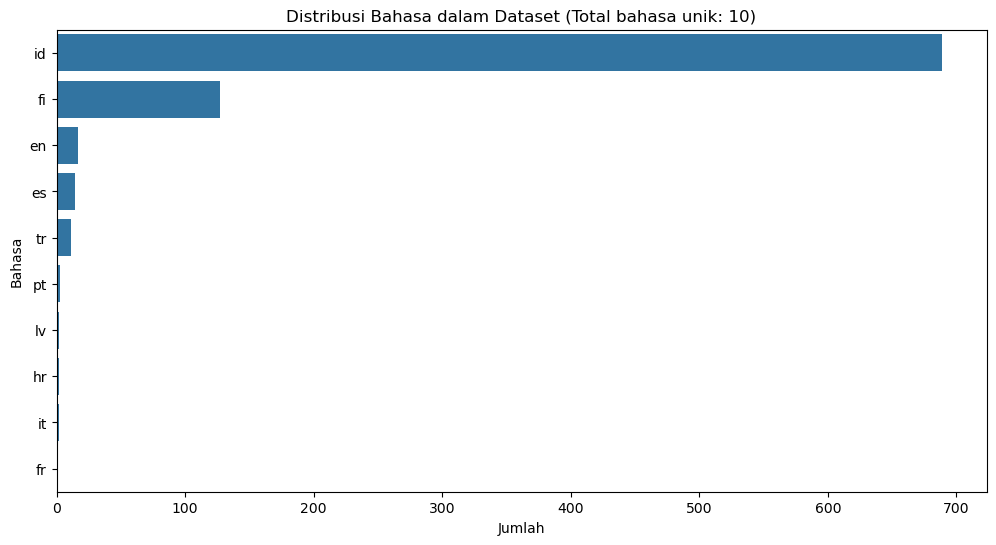

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# Menghitung jumlah bahasa unik
unique_languages_count = df['language'].nunique()
print(f"Jumlah bahasa unik yang ada: {unique_languages_count}")

# Menampilkan jumlah bahasa unik dalam plot
plt.figure(figsize=(12, 6))
sns.countplot(y='language', data=df, order=language_counts.index)
plt.title(f'Distribusi Bahasa dalam Dataset (Total bahasa unik: {unique_languages_count})')
plt.xlabel('Jumlah')
plt.ylabel('Bahasa')
plt.show()

In [5]:
# Import libraries
from langdetect import detect
from deep_translator import GoogleTranslator
import pandas as pd

# Function to translate text to English
def translate_to_english(text, source_lang):
    try:
        # If the text is already in English, return it as-is
        if source_lang == 'en':
            return text
        # Translate text to English
        translator = GoogleTranslator(source=source_lang, target='en')
        return translator.translate(text)
    except:
        return 'Translation error'

# Detect language for each text
df['language'] = df['full_text'].apply(detect_language)

# Translate all non-English texts to English
df['english_translation'] = df.apply(
    lambda row: translate_to_english(row['full_text'], row['language']),
    axis=1
)

# View result: displaying the first few rows
print(df[['full_text', 'language', 'english_translation']].head())


                                       full_text language  \
0  RT @_antens: Petrinja https://t.co/lT9GTMBs2h       id   
1  RT @_antens: Petrinja https://t.co/lT9GTMBs2h       id   
2  RT @_antens: Petrinja https://t.co/lT9GTMBs2h       id   
3  RT @_antens: Petrinja https://t.co/lT9GTMBs2h       id   
4  RT @_antens: Petrinja https://t.co/lT9GTMBs2h       id   

                             english_translation  
0  RT @_antens: Petrinja https://t.co/lT9GTMBs2h  
1  RT @_antens: Petrinja https://t.co/lT9GTMBs2h  
2  RT @_antens: Petrinja https://t.co/lT9GTMBs2h  
3  RT @_antens: Petrinja https://t.co/lT9GTMBs2h  
4  RT @_antens: Petrinja https://t.co/lT9GTMBs2h  


In [6]:
# Remove rows with 'Translation error' in english_translation column
df = df[df['english_translation'] != 'Translation error']

# Verify results
print(f"Number of rows after removing translation errors: {len(df)}")

Number of rows after removing translation errors: 868


In [7]:
df

,full_text,language,english_translation
0,RT @_antens: Petrinja https://t.co/lT9GTMBs2h,id,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
1,RT @_antens: Petrinja https://t.co/lT9GTMBs2h,id,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
2,RT @_antens: Petrinja https://t.co/lT9GTMBs2h,id,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
3,RT @_antens: Petrinja https://t.co/lT9GTMBs2h,id,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
4,RT @_antens: Petrinja https://t.co/lT9GTMBs2h,id,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
...,...,...,...
863,RT @_antens: Petrinja https://t.co/lT9GTMBs2h,id,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
864,RT @_antens: Petrinja https://t.co/lT9GTMBs2h,id,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
865,RT @_antens: Petrinja https://t.co/lT9GTMBs2h,id,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
866,RT @_antens: Petrinja https://t.co/lT9GTMBs2h,id,RT @_antens: Petrinja https://t.co/lT9GTMBs2h


In [8]:
languages_found = language_counts.index.tolist()
print("Bahasa yang ditemukan dalam dataset:")
print(languages_found)

Bahasa yang ditemukan dalam dataset:
['id', 'fi', 'en', 'es', 'tr', 'pt', 'lv', 'hr', 'it', 'fr']


In [9]:
# Drop 'full_text' and 'language' columns
df = df.drop(['full_text', 'language'], axis=1)

# Display the updated dataframe
df.head()

,english_translation
0,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
1,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
2,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
3,RT @_antens: Petrinja https://t.co/lT9GTMBs2h
4,RT @_antens: Petrinja https://t.co/lT9GTMBs2h


In [10]:
# Save the dataframe to an Excel file
df.to_excel('croatia_english_dataset.xlsx', index=False)

print("Dataframe has been saved to 'croatia_english_dataset.xlsx'")

Dataframe has been saved to 'croatia_english_dataset.xlsx'
